# Exercício - PCA
### Autor: Alexandre Marcondes


* Refaça a analise do exercicio de classificacao supervisionada, incluindo o PCA.
* Plote a curva explained_variance_ratio para encontrar uma quantidade de componentes que explique perto de 90% da variancia
---

### Bibliotecas

In [1]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

#Classificadores Lineares
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression

#Classificadores KNN
from sklearn.neighbors import KNeighborsClassifier

#Classificadores Naive Nayes
from sklearn.naive_bayes import MultinomialNB

#Classificadores Arvores de Decisão
from sklearn.tree import DecisionTreeClassifier

#SVM
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math

from sklearn import linear_model
from scipy.special import expit

from sklearn.metrics import confusion_matrix
import scipy
from scipy.io import arff

import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.svm import SVC
#from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
# from sklearn.externals import joblib

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut
from sklearn.cluster import KMeans

### Dados

In [2]:
drivers = pd.read_csv('vigencias_scores.csv')
drivers.columns

Index(['id_vei', 'id_uo_vei', 'id_motorista', 'id_uo_motorista',
       'distancia_percorrida_km', 'qtd_banguela', 'qtd_curvas',
       'qtd_aceleracoes', 'qtd_frenagens', 'qtd_vel_faixa_1',
       'qtd_vel_faixa_2', 'qtd_vel_faixa_3', 'tempo_vel_faixa_1',
       'tempo_vel_faixa_2', 'tempo_vel_faixa_3', 'qtd_vel_via_faixa_1',
       'qtd_vel_via_faixa_2', 'qtd_vel_via_faixa_3', 'tempo_vel_via_faixa_1',
       'tempo_vel_via_faixa_2', 'tempo_vel_via_faixa_3',
       'qtd_manuseio_celular', 'qtd_fadiga_motorista',
       'qtd_distracao_motorista', 'qtd_uso_cigarro', 'score_geral', 'rank'],
      dtype='object')

In [3]:
drivers = drivers.drop(['id_uo_vei','id_vei','id_uo_motorista','id_motorista','score_geral'],axis=1)
drivers.shape

(12642, 22)

In [4]:
drivers.head()

,distancia_percorrida_km,qtd_banguela,qtd_curvas,qtd_aceleracoes,qtd_frenagens,qtd_vel_faixa_1,qtd_vel_faixa_2,qtd_vel_faixa_3,tempo_vel_faixa_1,tempo_vel_faixa_2,...,qtd_vel_via_faixa_2,qtd_vel_via_faixa_3,tempo_vel_via_faixa_1,tempo_vel_via_faixa_2,tempo_vel_via_faixa_3,qtd_manuseio_celular,qtd_fadiga_motorista,qtd_distracao_motorista,qtd_uso_cigarro,rank
0,234.420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,208.0,0.0,1456.0,0.0,0.0,0.0,0.0,ruim
1,114.083,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,regular
2,183.725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,otimo
3,702.525,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,otimo
4,175.290,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,bom


In [5]:
y = drivers.loc[:,'rank']
X = drivers.drop(['rank'],axis=1)
print(y.shape)
print(X.shape)

(12642,)
(12642, 21)


### Classificação utilizando Kmeans

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

knn_clf = KNeighborsClassifier(n_neighbors=5)

knn_clf.fit(X_train, y_train)

y_pred = knn_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(cm)
print(classification_report(y_test, y_pred))

[[  97   79    1   13    3]
 [  24 1526    0    1    1]
 [   4    0   15    5   98]
 [  37   34    3   87   19]
 [  17    7   32   23  403]]
              precision    recall  f1-score   support

         bom       0.54      0.50      0.52       193
       otimo       0.93      0.98      0.95      1552
     pessimo       0.29      0.12      0.17       122
     regular       0.67      0.48      0.56       180
        ruim       0.77      0.84      0.80       482

    accuracy                           0.84      2529
   macro avg       0.64      0.59      0.60      2529
weighted avg       0.82      0.84      0.83      2529



### Classificação com PCA + KNN

In [7]:
from sklearn.decomposition import PCA

pca = PCA(8)
pca.fit(X)
XPCA = pca.transform(X)

X_train, X_test, y_train, y_test = train_test_split(XPCA,y, test_size=0.2)

knn_clf = KNeighborsClassifier(n_neighbors=5)

knn_clf.fit(X_train, y_train)

y_pred = knn_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(cm)
print(classification_report(y_test, y_pred))

[[  86   83    2   17    7]
 [  27 1535    0    5    0]
 [   1    1   16    8  102]
 [  41   95    3   40   17]
 [  17    3   32   26  365]]
              precision    recall  f1-score   support

         bom       0.50      0.44      0.47       195
       otimo       0.89      0.98      0.93      1567
     pessimo       0.30      0.12      0.18       128
     regular       0.42      0.20      0.27       196
        ruim       0.74      0.82      0.78       443

    accuracy                           0.81      2529
   macro avg       0.57      0.51      0.53      2529
weighted avg       0.77      0.81      0.78      2529



### Classificação utilizando PCA + Decision Tree

In [52]:
pca = PCA(8)
pca.fit(X)
XPCA = pca.transform(X)

X_train, X_test, y_train, y_test = train_test_split(XPCA,y, test_size=0.2)

tree_clf = DecisionTreeClassifier(random_state=0)

tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(cm)
print(classification_report(y_test, y_pred))

[[  70   62    3   26   17]
 [  62 1450    0   31    4]
 [   2    0   58    7   65]
 [  45   32    6  101   26]
 [  12    4   48   34  364]]
              precision    recall  f1-score   support

         bom       0.37      0.39      0.38       178
       otimo       0.94      0.94      0.94      1547
     pessimo       0.50      0.44      0.47       132
     regular       0.51      0.48      0.49       210
        ruim       0.76      0.79      0.78       462

    accuracy                           0.81      2529
   macro avg       0.62      0.61      0.61      2529
weighted avg       0.81      0.81      0.81      2529



In [53]:
print('Acurácia do dataset de treino:', accuracy_score(y_train, tree_clf.predict(X_train)))
print('Acurácia do dataset de teste:', accuracy_score(y_test, y_pred))

Acurácia do dataset de treino: 0.9997033521210323
Acurácia do dataset de teste: 0.8078291814946619


A diferença da acurácia entre o dataset de treino e teste indica overfitting.

Uma validação cruzada seria útil, além de uma escolha melhor de hiperparâmetros.

### Curva de variância

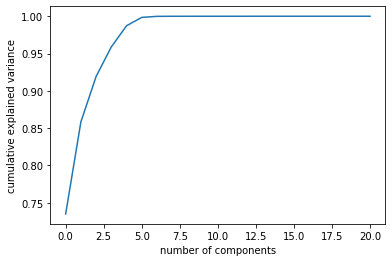

In [31]:
pca = PCA().fit(drivers.drop(['rank'],axis=1))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

O número de features é aproximadamente 8. Mais features podem ser utilizadas, porém não terá tanta influência na acurácia obtida pelo modelo.

### Criação de pipelines com PCA
---

### Pipeline - PCA com Decision Tree

In [55]:
#  Divisão em dataset de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

pca = PCA()
tree = DecisionTreeClassifier(random_state=0)

# Criação da pipeline
pipe_tree = Pipeline(steps=[('pca', pca),  # Redução de dimensão
                            ('tree', tree)  # Algoritmo classificador
                           ],
                     verbose=False
                    )

#  Fit do modelo com a pipeline criada
# pipe_tree.fit(X_train,y_train)
#  Predição do modelo
# y_pred = pipe_tree.predict(X_test)

#  Grid search
tree_criterion_list = ['gini','entropy']
tree_depth_list = list(range(0,40))
pca_components_list = list(range(0,15))

params = {'pca__n_components':pca_components_list,
          'tree__criterion':tree_criterion_list,
          'tree__max_depth':tree_depth_list}

clf = GridSearchCV(estimator=pipe_tree,
                   param_grid=params,
                   verbose=2,
                   n_jobs=-1,
                   scoring= 'accuracy',
                   return_train_score=True)

clf.fit(X_train,y_train)

print('Best Criterion:', clf.best_estimator_.get_params()['tree__criterion'])
print('Best max_depth:', clf.best_estimator_.get_params()['tree__max_depth'])
print('Best Number Of Components:', clf.best_estimator_.get_params()['pca__n_components'])
print('Mean cross-validated score of the best_estimator:', clf.best_score_)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 1025 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 1308 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 1673 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 2118 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 2645 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 3252 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 3941 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4710 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 5561 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:  2.6min finished


Best Criterion: entropy
Best max_depth: 17
Best Number Of Components: 14
Mean cross-validated score of the best_estimator: 0.9014678151374108


In [57]:
y_pred = clf.predict(X_test)
#  Exibição dos resultados
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[ 84   7   0  15   4]
 [ 11 730   0   3   1]
 [  0   0  42   8  11]
 [ 11   6   2  65   9]
 [  3   2  11  15 225]]
              precision    recall  f1-score   support

         bom       0.77      0.76      0.77       110
       otimo       0.98      0.98      0.98       745
     pessimo       0.76      0.69      0.72        61
     regular       0.61      0.70      0.65        93
        ruim       0.90      0.88      0.89       256

    accuracy                           0.91      1265
   macro avg       0.81      0.80      0.80      1265
weighted avg       0.91      0.91      0.91      1265



### Pipeline - PCA com Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

#  Divisão em dataset de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

pca = PCA()
forest = RandomForestClassifier(random_state=0)

# Criação da pipeline
pipe_forest = Pipeline(steps=[('pca', pca),  # Redução de dimensão
                            ('forest', forest)  # Algoritmo classificador
                           ],
                     verbose=False
                    )

#  Fit do modelo com a pipeline criada
# pipe_tree.fit(X_train,y_train)
#  Predição do modelo
# y_pred = pipe_tree.predict(X_test)

#  Grid search
forest_criterion_list = ['gini','entropy']
forest_estimators = list(range(0,100,25))
forest_depth_list = list(range(0,40))
pca_components_list = list(range(0,15))

params = {'pca__n_components':pca_components_list,
          'forest__criterion':forest_criterion_list,
          'forest__max_depth':forest_depth_list,
          'forest__n_estimators':forest_estimators}

clf = GridSearchCV(estimator=pipe_forest,
                   param_grid=params,
                   verbose=2,
                   n_jobs=-1,
                   scoring= 'accuracy',
                   return_train_score=True)

clf.fit(X_train,y_train)

print('Best Criterion:', clf.best_estimator_.get_params()['forest__criterion'])
print('Best max_depth:', clf.best_estimator_.get_params()['forest__max_depth'])
print('Best number of estimators:', clf.best_estimator_.get_params()['forest__n_estimators'])
print('Best Number Of Components:', clf.best_estimator_.get_params()['pca__n_components'])
print('Mean cross-validated score of the best_estimator:', clf.best_score_)

Fitting 5 folds for each of 4800 candidates, totalling 24000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 9089 tasks      | 

Best Criterion: gini
Best max_depth: 16
Best number of estimators: 50
Best Number Of Components: 14
Mean cross-validated score of the best_estimator: 0.9264305606520018


In [44]:
y_pred = clf.predict(X_test)
#  Exibição dos resultados
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[ 73  17   0  13   3]
 [ 10 748   0   0   0]
 [  0   0  43   2  17]
 [  8   1   0  80  16]
 [  0   1   5  10 218]]
              precision    recall  f1-score   support

         bom       0.80      0.69      0.74       106
       otimo       0.98      0.99      0.98       758
     pessimo       0.90      0.69      0.78        62
     regular       0.76      0.76      0.76       105
        ruim       0.86      0.93      0.89       234

    accuracy                           0.92      1265
   macro avg       0.86      0.81      0.83      1265
weighted avg       0.92      0.92      0.92      1265



### Resumo dos resultados

* A acurácia do PCA + Decision Tree foi de 81% no dataset de teste, sem validação cruzada e otimização dos hiperparâmetros.
* Com validação cruzada, a acurácia do PCA + Decision Tree foi aumentada para 90%.
* Com PCA + Random Forest, utilizando validação cruzada e otimização parâmetros, a acurácia obtida foi de 92%.